# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as pp
from randomforest import Preprocessor

df_train: pd.DataFrame = pd.read_csv("./input/train.csv")
#print(df_train.describe())
print(df_train.info())
print(df_train.head(10))
print(df_train.isnull().sum())

# Plot pairwise those features where we expect
# g = sns.FacetGrid(df_train, hue="Survived")
# g.map(sns.histplot, "Sex")
# g.add_legend()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         

# Categorial plots

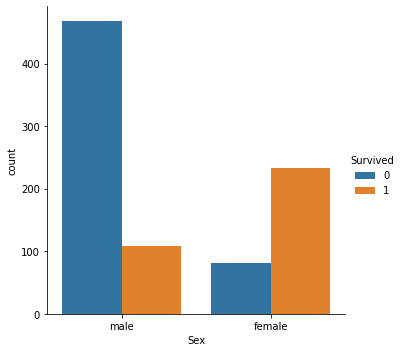

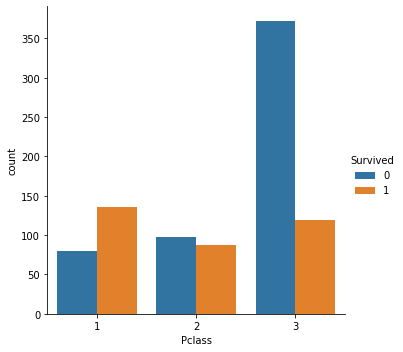

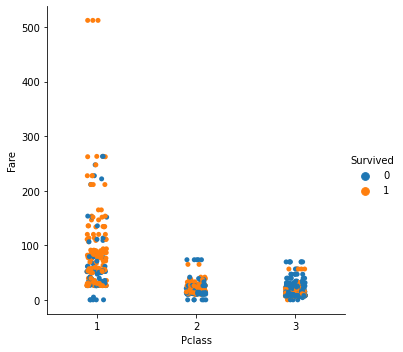

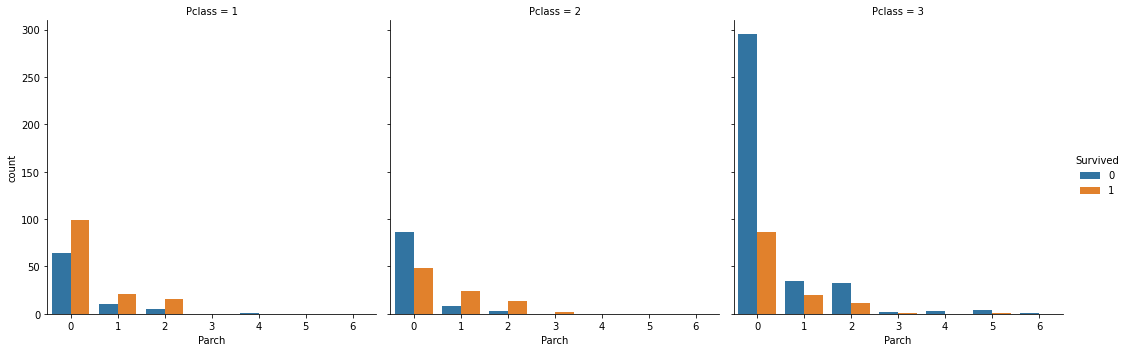

In [45]:
# sns.countplot(x='Sex', hue='Survived', data=df_train)
sns.catplot(x='Sex', hue='Survived', data=df_train, kind='count')
pp.show()
sns.catplot(x='Pclass', hue='Survived', data=df_train, kind='count')
pp.show()
sns.catplot(x='Pclass', hue='Survived', y='Fare', data=df_train)
pp.show()
sns.catplot(x='Parch', hue='Survived', col='Pclass', data=df_train, kind='count')
pp.show()

#sns.histplot(x='Age', hue='Survived', data=df_train, binwidth=5.0)
#sns.displot(x='Age', hue='Survived', col='Survived', data=df_train)
#pp.show()

# Distribution plots

## By age

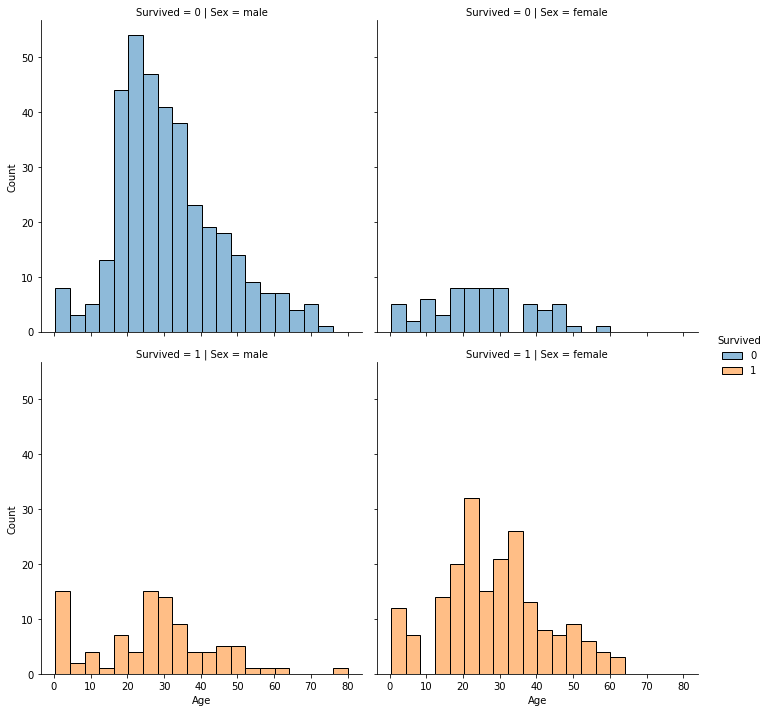

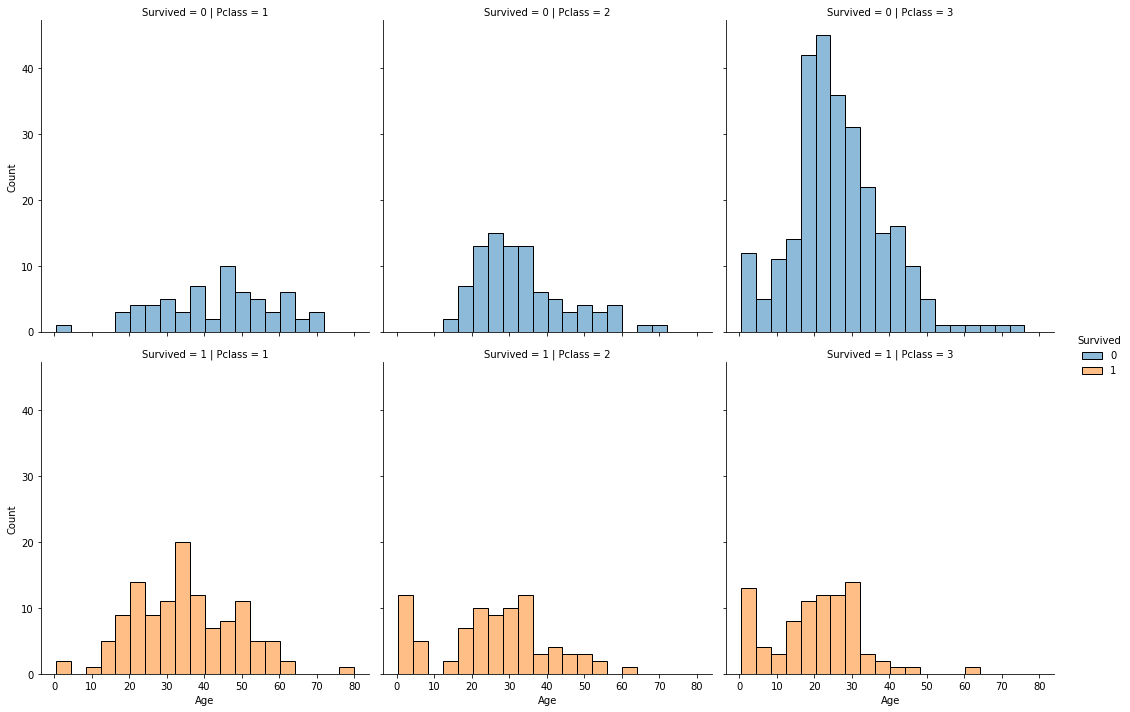

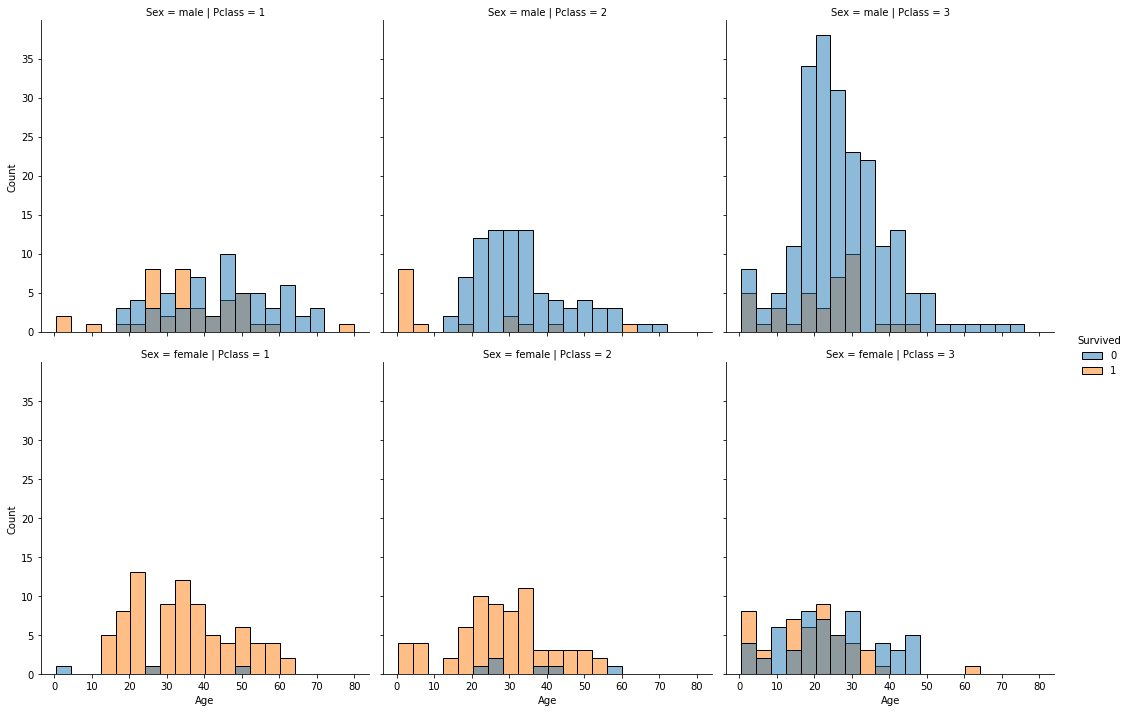

In [46]:
sns.displot(x='Age', hue='Survived', col='Sex', row='Survived', data=df_train)
pp.show()

sns.displot(x='Age', hue='Survived', col='Pclass', row='Survived', data=df_train)
pp.show()

sns.displot(x='Age', hue='Survived', col='Pclass', row='Sex', data=df_train)
pp.show()

## By fare

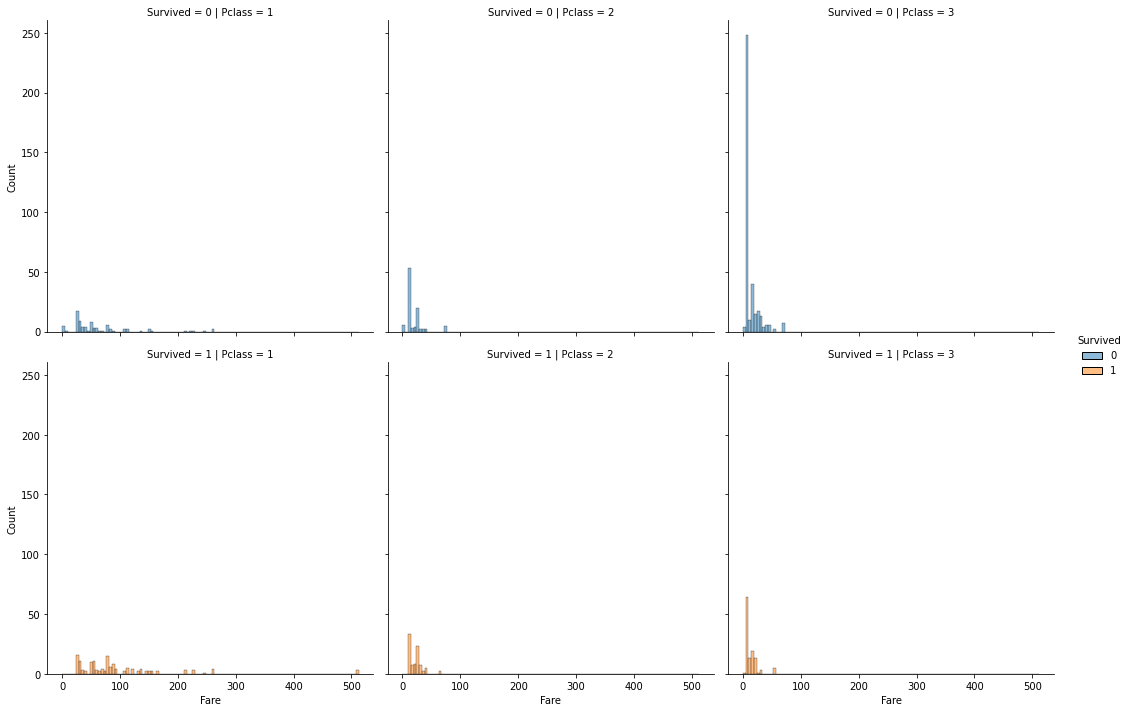

In [47]:
sns.displot(x='Fare', hue='Survived', col='Pclass', row='Survived', data=df_train)
pp.show()


# Numeric features: Find pairwise linear dependencies with pair plots in

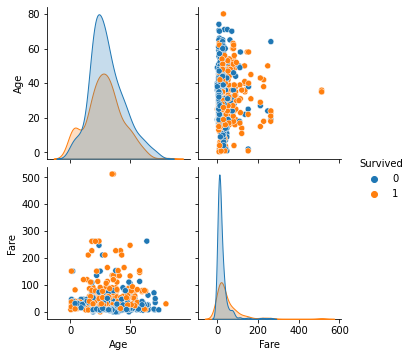

In [48]:
sns.pairplot(data=df_train, hue="Survived", vars=["Age", "Fare"], height=2.5, dropna=True)
pp.show()

In [49]:
# Preprocessing: Sex, Embarked -> Categorial

In [50]:
pp = Preprocessor()
df_train_pp: pd.DataFrame = pp.process(df_train)


In [51]:
df_train_pp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    float64
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 55.6 KB


# Create train and test data from train data set

In [106]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

df_train = df_train_pp.drop(labels='Survived', axis=1)
s_Y: pd.Series = df_train_pp["Survived"]
s_Y.describe()
X_train, X_test, y_train, y_test = train_test_split(df_train, s_Y.to_numpy(), train_size=0.8, random_state=2)


classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)
cross_val_score(DecisionTreeClassifier(random_state=42), cv=5, X=df_train.to_numpy(), y=s_Y.to_numpy()).mean()

0.7361469516399094